In [53]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import math
import pickle
from scipy.stats import norm
# import tensorflow as tf
import seaborn as sns
#sns.set()

from utils.plotting import plot_trajectory
from utils.processing import (
    open_file,
    cut_jumps,
    normalize_angles_2pi,
    open_preprocessed_data,
)

## plot original preprocessed trajectories (can be skipped)

In [51]:

with open('merg_resampled_dfs_dict_with_stops.pkl', 'rb') as fp:
    orig_traj_for_plot = pickle.load(fp)

In [43]:
with open('Preproc_LondonModelMay24.pickle', 'rb') as fp:
    dict_traj_london = pickle.load(fp)

### plot orig

In [78]:
df['near'] = 'idk'

In [83]:
df.loc[df['near_wall'].isin([1, 2, 3, 4]), 'near'] = 1
df.loc[df['near_wall'].isin([10, 20, 30, 40]), 'near'] = 2
df.loc[df['near_wall'].isin([0]), 'near'] = 3

In [85]:
df['near'].value_counts()

1    3604
2     312
3      73
Name: near, dtype: int64

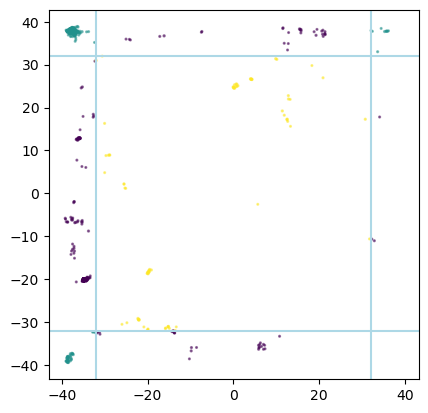

In [100]:
#df = cut_jumps(df, xmax=40, xmin=-40, ymax=40, ymin=-40,show=False)
df = df.loc[df['movement']=='Stop']
df.loc[df['near_wall'].isin([1, 2, 3, 4]), 'near'] = 1
df.loc[df['near_wall'].isin([10, 20, 30, 40]), 'near'] = 2
df.loc[df['near_wall'].isin([0]), 'near'] = 3
# depict illustration
fig = plt.figure()
# ax = fig.add_subplot()
plt.scatter(df['x'], df['y'], s=(10 / df['step_sum_0.5'])**0.25, alpha=0.5,c=df['near'])
#plt.axis('square')
            #,c=df['near_wall'], alpha=0.5)
# square plot
# ax.set_aspect('equal', adjustable='box')
plt.axvline(x = 32, color = 'lightblue')
plt.axvline(x = -32, color = 'lightblue')
plt.axhline(y = 32, color = 'lightblue')
plt.axhline(y = -32, color = 'lightblue')
plt.axis('square')
plt.show()

tr11


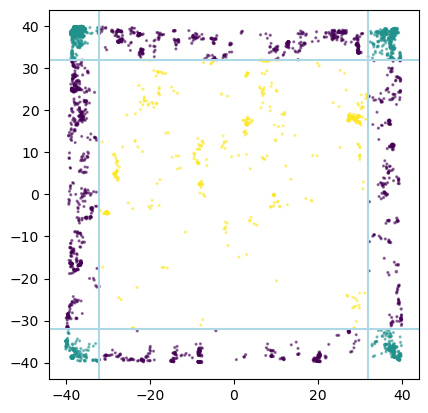

tr12


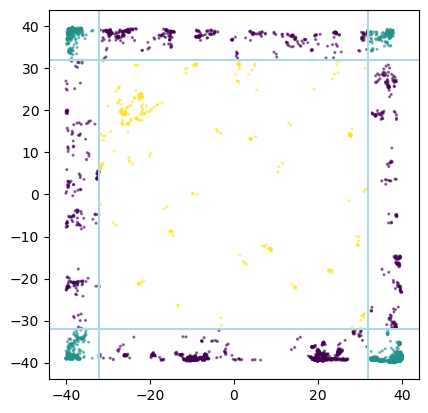

tr2


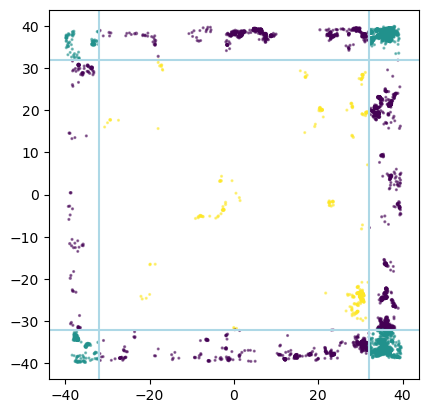

tr3


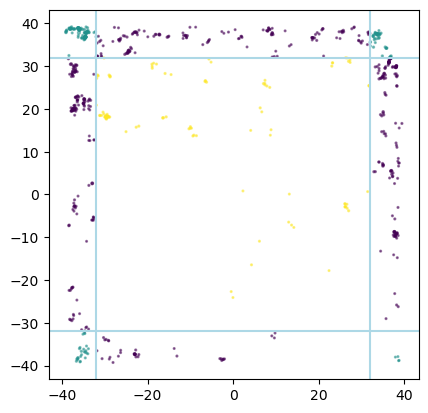

tr4


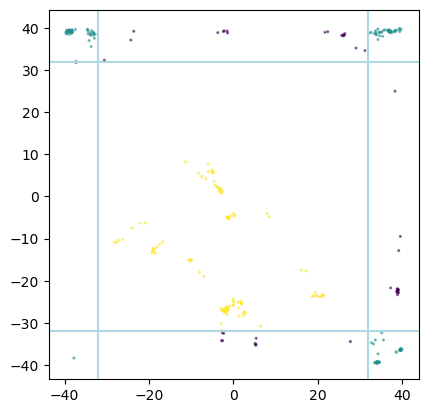

tr5


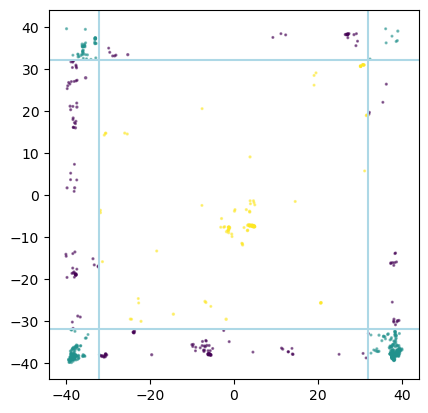

tr6


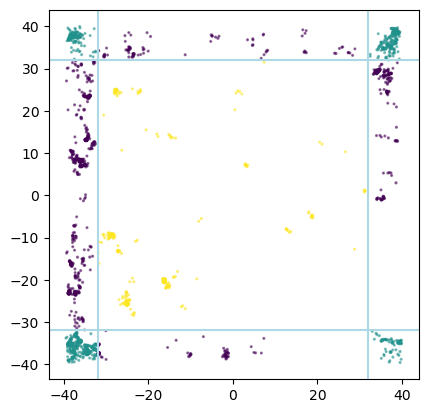

tr7


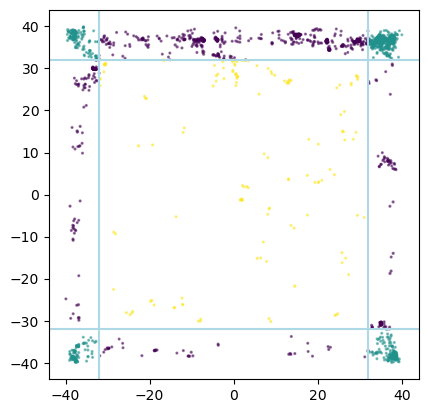

tr91


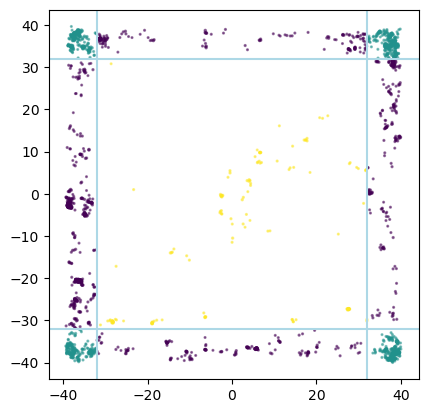

tr92


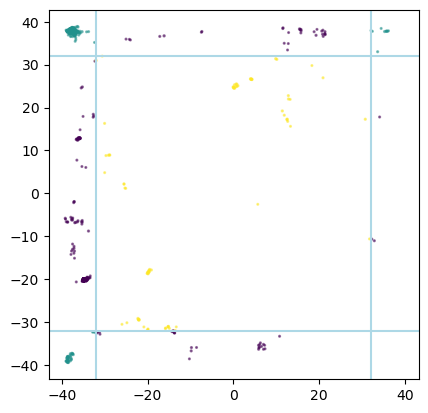

In [102]:
for q, df in orig_traj_for_plot.items():
    print(q)
    df = cut_jumps(df, xmax=40, xmin=-40, ymax=40, ymin=-40,show=False)
    df = df.loc[df['movement']=='Stop']
    df.loc[df['near_wall'].isin([1, 2, 3, 4]), 'near'] = 1
    df.loc[df['near_wall'].isin([10, 20, 30, 40]), 'near'] = 2
    df.loc[df['near_wall'].isin([0]), 'near'] = 3
    # depict illustration
    fig = plt.figure()
    # ax = fig.add_subplot()
    plt.scatter(df['x'], df['y'], s=(10 / df['step_sum_0.5'])**0.25, alpha=0.5,c=df['near'])
    plt.axvline(x = 32, color = 'lightblue')
    plt.axvline(x = -32, color = 'lightblue')
    plt.axhline(y = 32, color = 'lightblue')
    plt.axhline(y = -32, color = 'lightblue')
    plt.axis('square')
    plt.show()

In [55]:
orig_traj_for_plot['tr11']['movement']

0       Move
1       Move
2       Move
3       Move
4       Move
        ... 
5950    Stop
5951    Move
5952    Move
5953    Move
5954    Move
Name: movement, Length: 5955, dtype: object

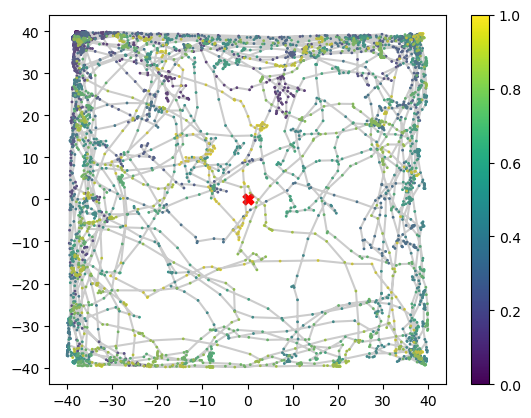

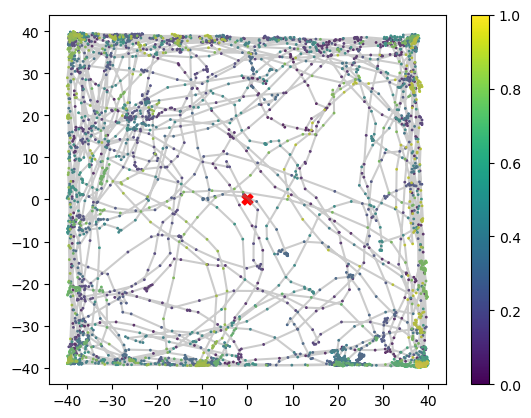

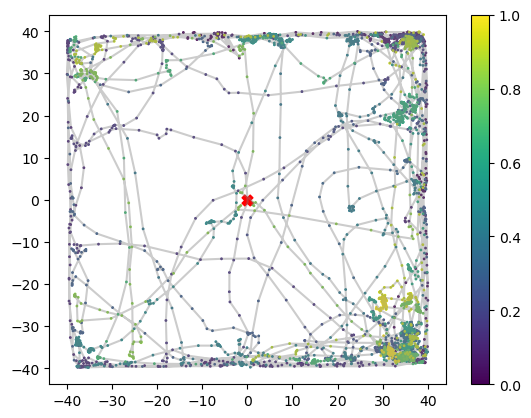

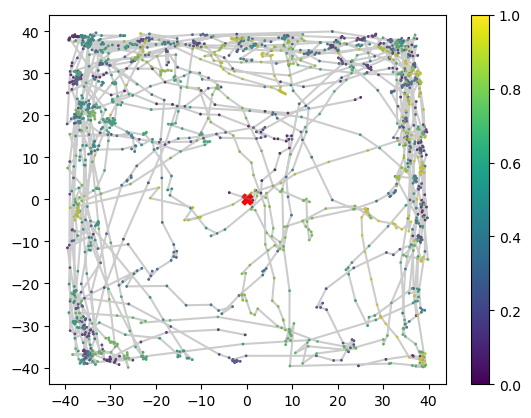

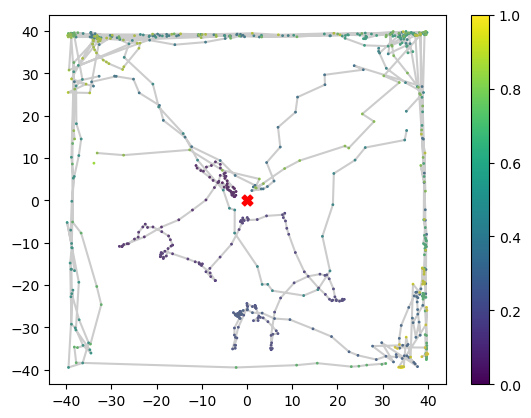

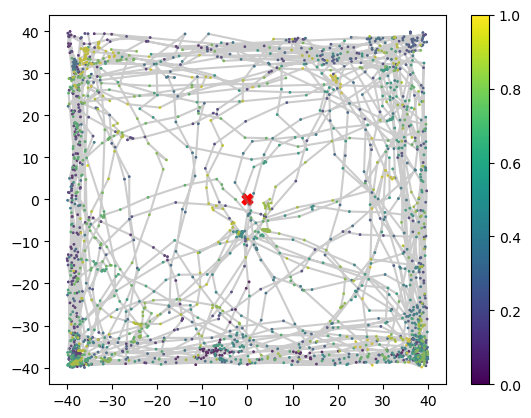

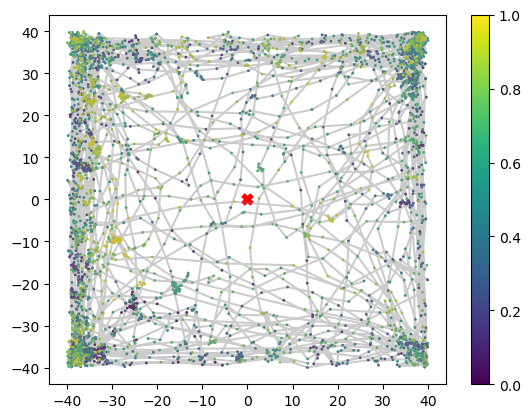

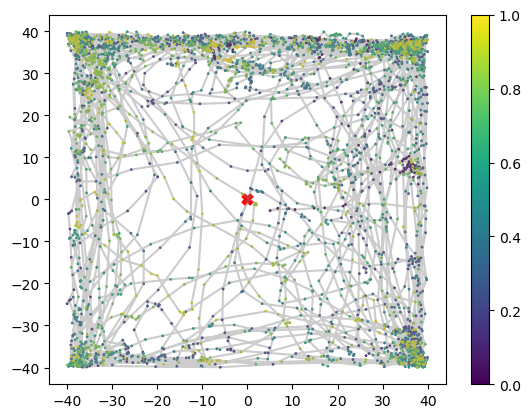

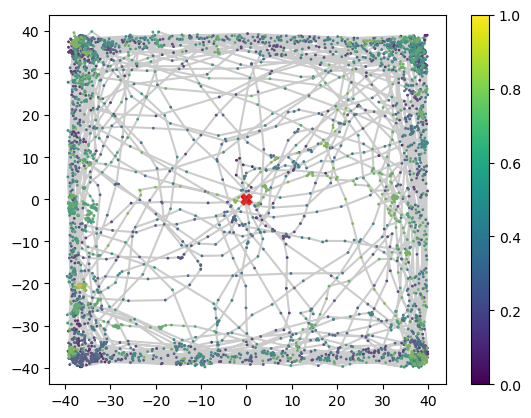

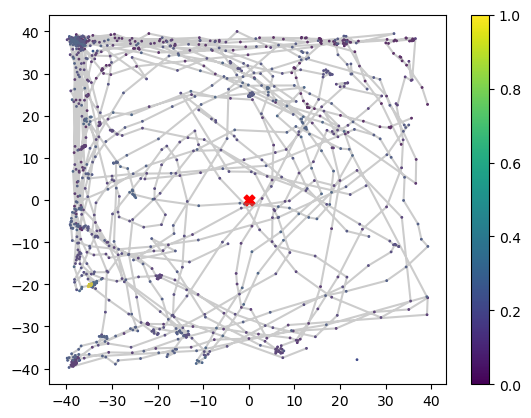

In [13]:
for q, df in orig_traj_for_plot.items():
    df = cut_jumps(df, xmax=40, xmin=-40, ymax=40, ymin=-40,show=False)
    plot_trajectory(df['x'], df['y'])

### plot london

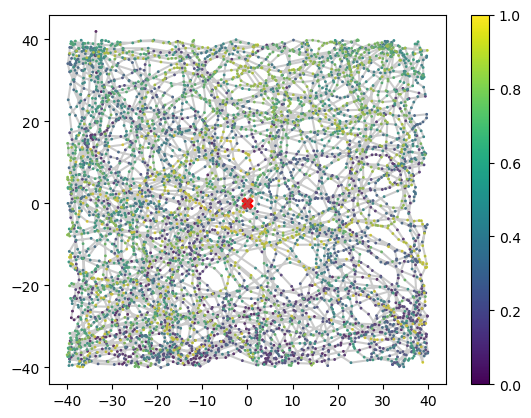

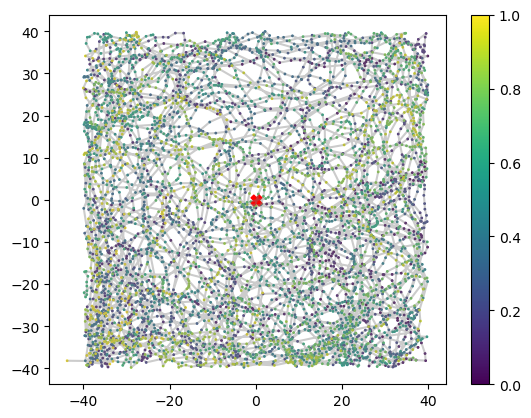

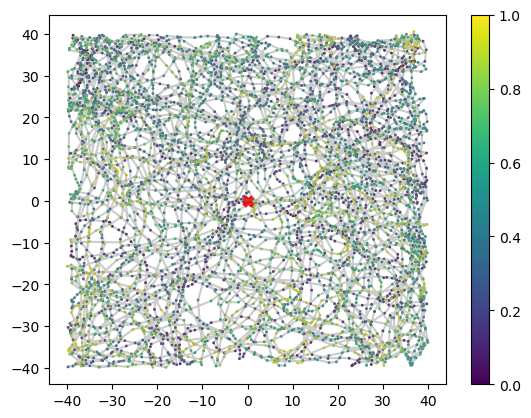

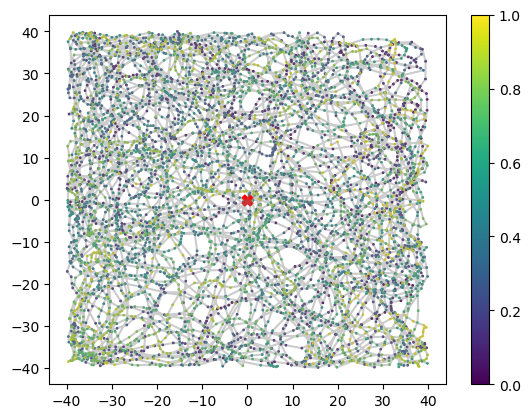

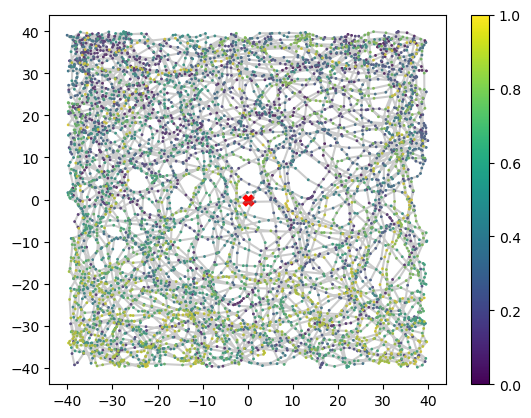

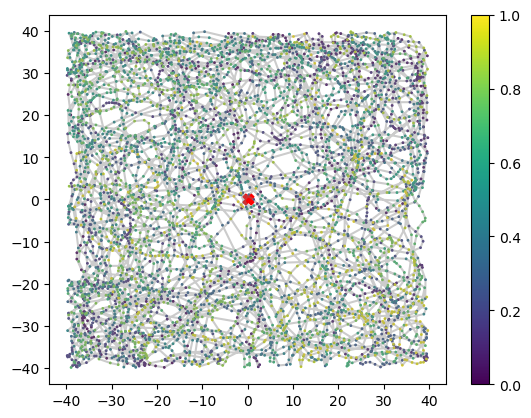

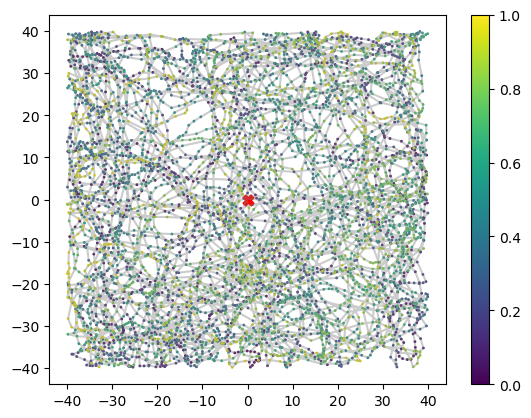

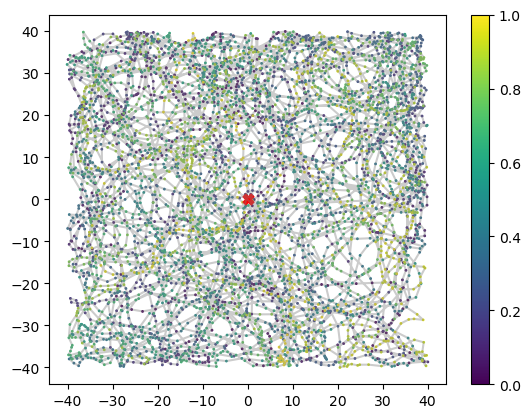

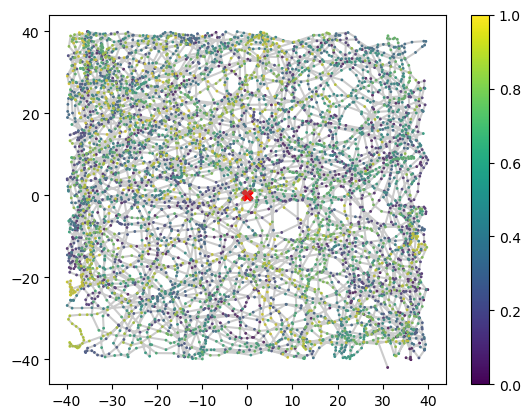

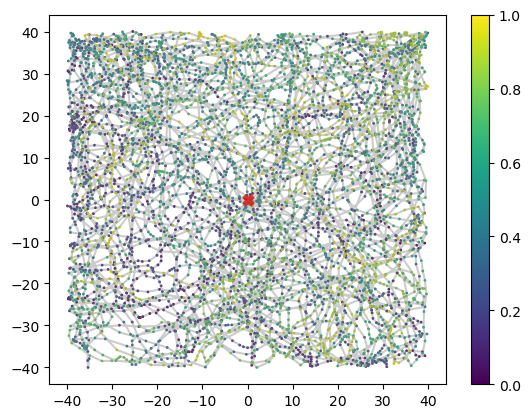

In [49]:
for k, df in dict_traj_london['with pauses'].items():
    plot_trajectory(df['x'], df['y'])

## remake original data distrbs (can be skipped)

In [2]:
with open('may_check_big_averaged_dfs.pkl', 'rb') as fp:
    big_averaged_dfs = pickle.load(fp)

In [3]:
big_averaged_dfs.keys()

dict_keys(['center', 'corner', 'wall'])

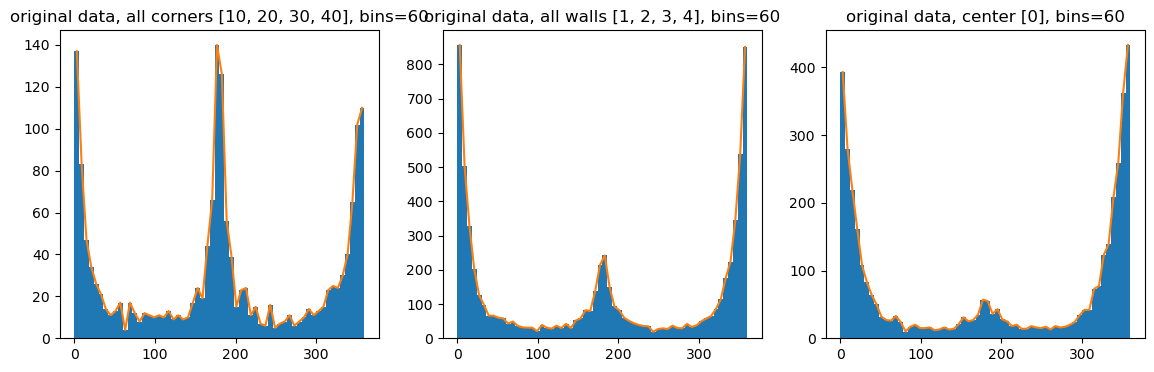

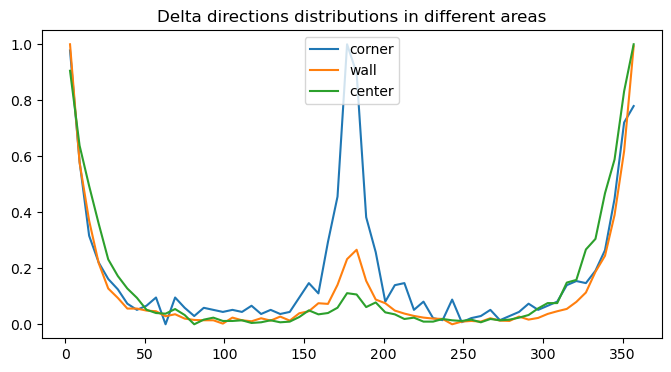

In [5]:
bins = 60

#all normalized
def min_max_normalize(y):
    yn = (y - y.min()) / (y.max() - y.min())
    return yn


fig, axes = plt.subplots(1, 3, figsize=(14, 4))
delta_ang_hist = {}

freqs, binEdges, _ = axes[0].hist(big_averaged_dfs['corner']['delta_angle'], range=(0, 360), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['corner']  = [bin_mid, freqs]
axes[0].plot(bin_mid, freqs)
axes[0].set_title(f'original data, all corners [10, 20, 30, 40], bins={bins}')

freqs, binEdges, _ = axes[1].hist(big_averaged_dfs['wall']['delta_angle'], range=(0, 360), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['wall']  = [bin_mid, freqs]
axes[1].plot(bin_mid, freqs)
axes[1].set_title(f'original data, all walls [1, 2, 3, 4], bins={bins}')

freqs, binEdges, _ = axes[2].hist(big_averaged_dfs['center']['delta_angle'], range=(0, 360), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['center']  = [bin_mid, freqs]
axes[2].plot(bin_mid, freqs)
axes[2].set_title(f'original data, center [0], bins={bins}')

plt.figure(figsize=(8,4))
for k, l in delta_ang_hist.items():
    l[1] = min_max_normalize(l[1])
    plt.plot(l[0], l[1], label=k)
plt.title('Delta directions distributions in different areas')
plt.legend()
plt.show()

# Save distributions
# with open(f'FOR_COMPARE_orig_delta_angle_0_3_s_bins_{bins}.pkl', 'wb') as fp:    
#     pickle.dump(delta_ang_hist, fp)

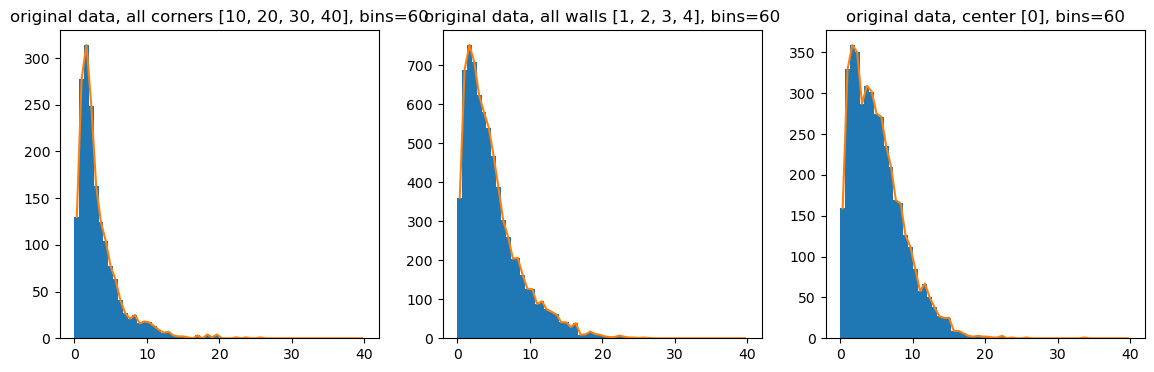

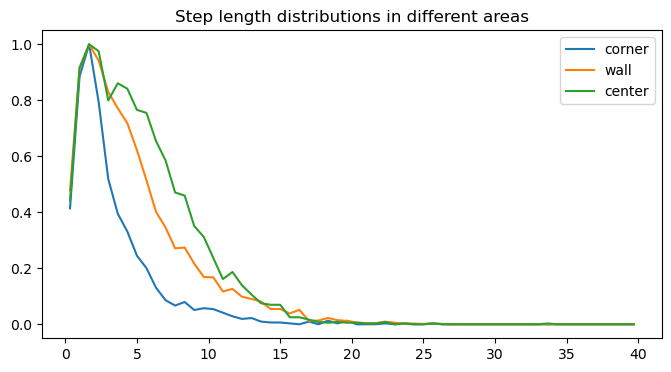

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
delta_ang_hist = {}

freqs, binEdges, _ = axes[0].hist(big_averaged_dfs['corner']['step_length'], range=(0, 40), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['corner']  = [bin_mid, freqs]
axes[0].plot(bin_mid, freqs)
axes[0].set_title(f'original data, all corners [10, 20, 30, 40], bins={bins}')

freqs, binEdges, _ = axes[1].hist(big_averaged_dfs['wall']['step_length'], range=(0, 40), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['wall']  = [bin_mid, freqs]
axes[1].plot(bin_mid, freqs)
axes[1].set_title(f'original data, all walls [1, 2, 3, 4], bins={bins}')

freqs, binEdges, _ = axes[2].hist(big_averaged_dfs['center']['step_length'], range=(0, 40), bins=bins)
bin_mid = 0.5 * (binEdges[1:] + binEdges[:-1])
delta_ang_hist['center']  = [bin_mid, freqs]
axes[2].plot(bin_mid, freqs)
axes[2].set_title(f'original data, center [0], bins={bins}')

plt.figure(figsize=(8,4))
for k, l in delta_ang_hist.items():
    l[1] = min_max_normalize(l[1])
    plt.plot(l[0], l[1], label=k)
plt.title('Step length distributions in different areas')
plt.legend()
plt.show()

# Save distributions
# with open(f'FOR_COMPARE_orig_step_length_distr_0_3_s_bins_{bins}.pkl', 'wb') as fp:    
#     pickle.dump(delta_ang_hist, fp)

## open distributions

In [14]:
#original data
with open('FOR_COMPARE_orig_step_length_distr_0_3_s_bins_60.pkl', 'rb') as fp:
    orig_stepl = pickle.load(fp)
with open('FOR_COMPARE_orig_delta_angle_0_3_s_bins_60.pkl', 'rb') as fp:
    orig_dang = pickle.load(fp)

In [15]:
#2d rw
with open('gauss_random_model_delta_angle_0_3_s_bins_60.pkl', 'rb') as fp:
    rand_stepl = pickle.load(fp)
with open('gauss_random_step_length_distr_0_3_s_bins_60.pkl', 'rb') as fp:
    rand_dang = pickle.load(fp)

In [17]:
#london
with open('model_london_step_length_distr_0_3_s_bins_60.pkl', 'rb') as fp:
    lond_stepl = pickle.load(fp)
with open('model_london_delt_ang_distr_0_3_s_bins_60.pkl', 'rb') as fp:
    lond_dang = pickle.load(fp)

In [18]:
#our model
with open('model_our_real_step_length_distr_0_3_s_bins_60.pkl', 'rb') as fp:
    realm_stepl = pickle.load(fp)
with open('model_our_real_delt_ang_distr_0_3_s_bins_60.pkl', 'rb') as fp:
    realm_dang = pickle.load(fp)

### plot them

In [26]:
plt.style.use('seaborn-v0_8-bright')

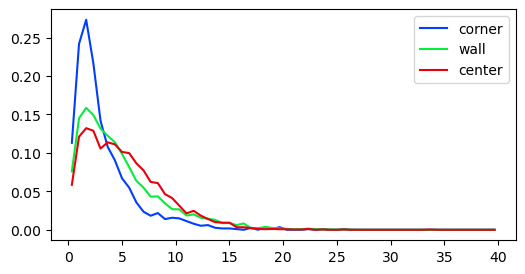

In [38]:
#original data
x = orig_stepl['corner'][0]
plt.figure(figsize=(6,3))
for a in list(orig_stepl.keys()):
    q = orig_stepl[a][1]
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    q = q * k_q
    plt.plot(x, q, label=a)
plt.legend()
plt.show()

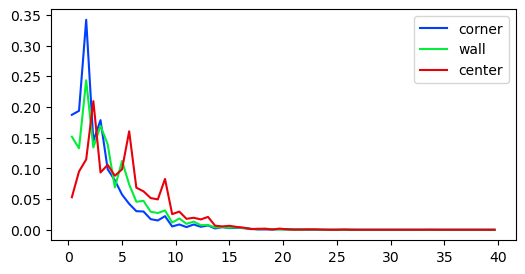

In [37]:
#our model
x = orig_stepl['corner'][0]
plt.figure(figsize=(6,3))
for a in list(realm_stepl.keys()):
    q = realm_stepl[a][1]
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    q = q * k_q
    plt.plot(x, q, label=a)
plt.legend()
plt.show()

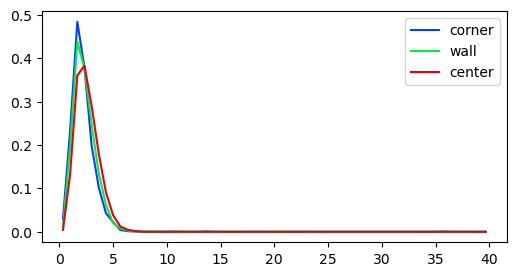

In [36]:
#london model
x = orig_stepl['corner'][0]
plt.figure(figsize=(6,3))
for a in list(lond_stepl.keys()):
    q = lond_stepl[a][1][0]
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    q = q * k_q
    plt.plot(x, q, label=a)
plt.legend()
plt.show()

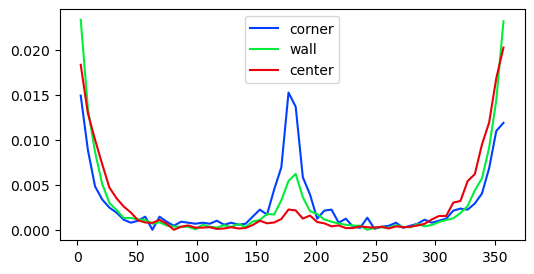

In [40]:
#original data
x = orig_dang['corner'][0]
plt.figure(figsize=(6,3))
for a in list(orig_dang.keys()):
    q = orig_dang[a][1]
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    q = q * k_q
    plt.plot(x, q, label=a)
plt.legend()
plt.show()

In [ ]:
# x = orig_stepl['corner'][0]
# plt.figure()
# for a in list(realm_stepl.keys()):
#     q = realm_stepl[a][1]
#     k_q = 1 / ((x[1] - x[0]) * sum(q))
#     q = q * k_q
#     plt.plot(x, q, label=a)
# plt.legend()
# plt.show()

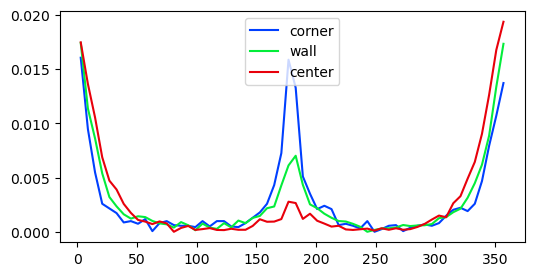

In [39]:
#our model
x = orig_dang['corner'][0]
plt.figure(figsize=(6,3))
for a in list(realm_dang.keys()):
    q = realm_dang[a][1]
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    q = q * k_q
    plt.plot(x, q, label=a)
plt.legend()
plt.show()

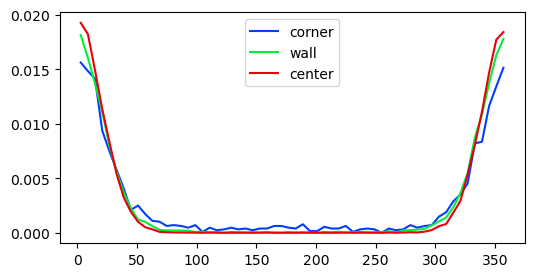

In [41]:
#london model
x = orig_dang['corner'][0]
plt.figure(figsize=(6,3))
for a in list(lond_dang.keys()):
    q = lond_dang[a][1][0]
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    q = q * k_q
    plt.plot(x, q, label=a)
plt.legend()
plt.show()

## compare

In [19]:
def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

### example (skip)

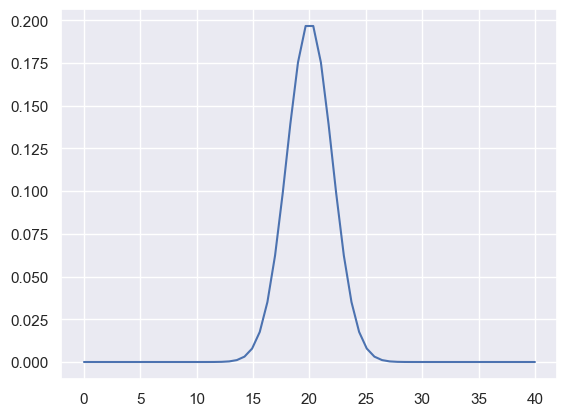

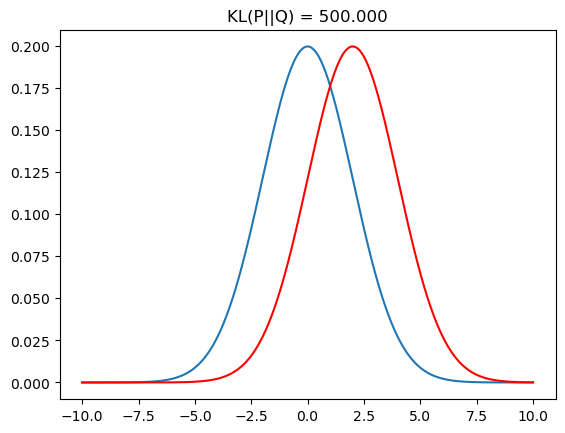

In [23]:
x = np.arange(-10, 10, 0.001)
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 2)
plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')

### real model

sse 0.01995730347975089
corner, Data-based vs original KL(P||Q) = 0.1041130


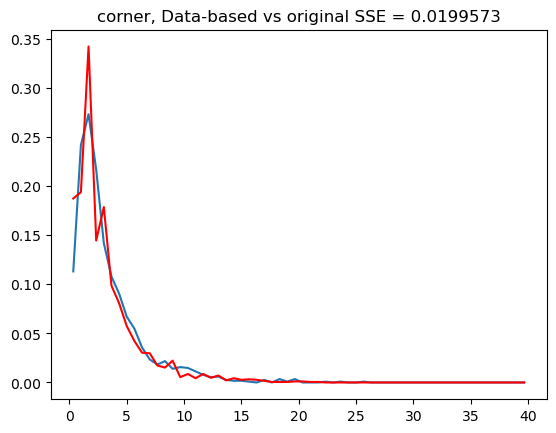

sse 0.018840903852823422
wall, Data-based vs original KL(P||Q) = 0.1156395


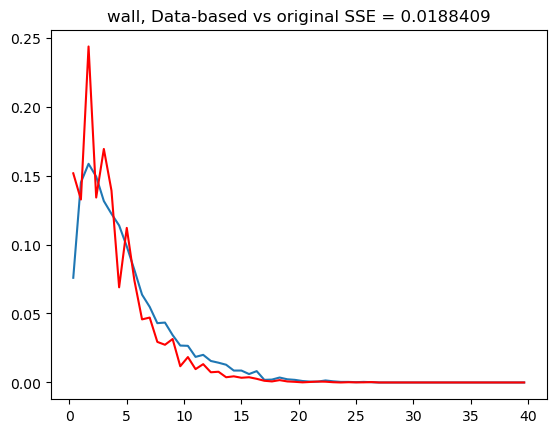

sse 0.014447449589320281
center, Data-based vs original KL(P||Q) = 0.0672320


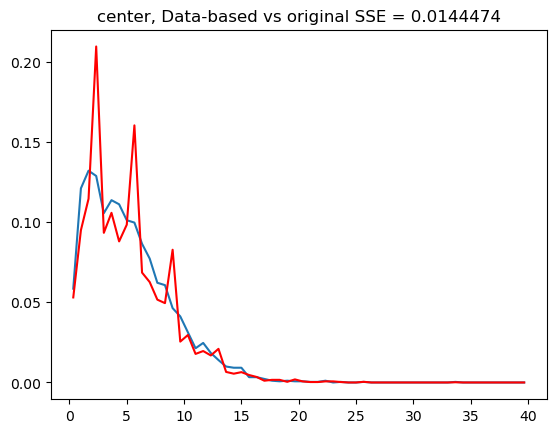

In [48]:
x = orig_stepl['corner'][0]
for a in list(orig_stepl.keys()):
    p = orig_stepl[a][1]
    q = realm_stepl[a][1]
    k_p = 1 / ((x[1] - x[0]) * sum(p))
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    p = p * k_p
    q = q * k_q
    sse = np.sum((p - q)**2)
    p[p==0] = 0.0000001
    q[q==0] = 0.0000001
    # print(sum(p) * (x[1] - x[0]))
    # print(sum(q) * (x[1] - x[0]))
    print('sse',sse) 
    print(a+', Data-based vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
    plt.figure()
    plt.title(a+', Data-based vs original SSE = %1.7f' % sse)
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    plt.show()

In [49]:
# x = orig_stepl['corner'][0]
# for a in list(orig_stepl.keys()):
#     p = orig_stepl[a][1]
#     q = realm_stepl[a][1]
#     k_p = 1 / ((x[1] - x[0]) * sum(p))
#     k_q = 1 / ((x[1] - x[0]) * sum(q))
#     p = p * k_p
#     q = q * k_q
#     # print(sum(p) * (x[1] - x[0]))
#     # print(sum(q) * (x[1] - x[0]))
#     sse = np.sum((p - q)**2)
#     p[p==0] = 0.0000001
#     q[q==0] = 0.0000001
#     print('sse',sse) 
#     print(a+', Data-based vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
#     plt.figure()
#     plt.title(a+', Data-based vs original SSE = %1.7f' % sse)
#     plt.plot(x, p)
#     plt.plot(x, q, c='red')
#     plt.show()

In [50]:
# x = orig_stepl['corner'][0]
# for a in list(orig_stepl.keys()):
#     p = orig_stepl[a][1]
#     q = realm_stepl[a][1]
#     k_p = 1 / ((x[1] - x[0]) * sum(p))
#     k_q = 1 / ((x[1] - x[0]) * sum(q))
#     p = p * k_p
#     q = q * k_q
#     # print(sum(p) * (x[1] - x[0]))
#     # print(sum(q) * (x[1] - x[0]))
#     sse = np.sum((p - q)**2)
#     print('sse',sse) 
#     print(a+', Data-based vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
#     plt.figure()
#     plt.title(a+', Data-based vs original SSE = %1.7f' % sse)
#     plt.plot(x, p)
#     plt.plot(x, q, c='red')
#     plt.show()
    

sse 1.346272318013209e-05
corner, Data-based vs original KL(P||Q) = 0.0033860


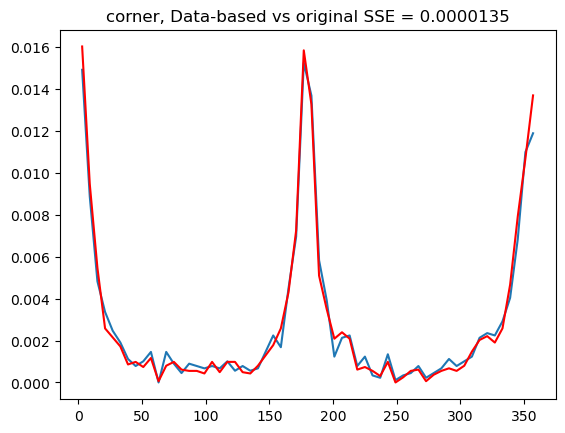

sse 8.331057695414811e-05
wall, Data-based vs original KL(P||Q) = 0.0044878


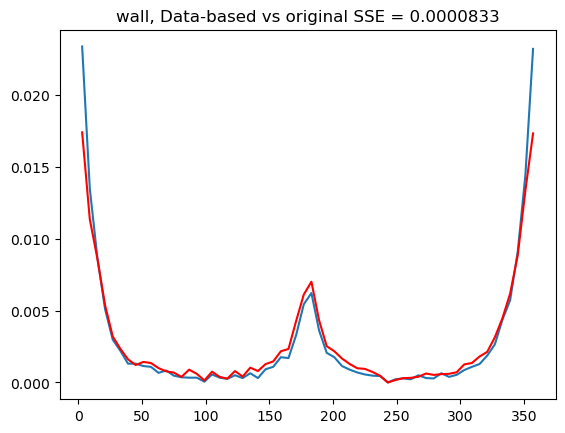

sse 4.7771618973877166e-06
center, Data-based vs original KL(P||Q) = 0.0006298


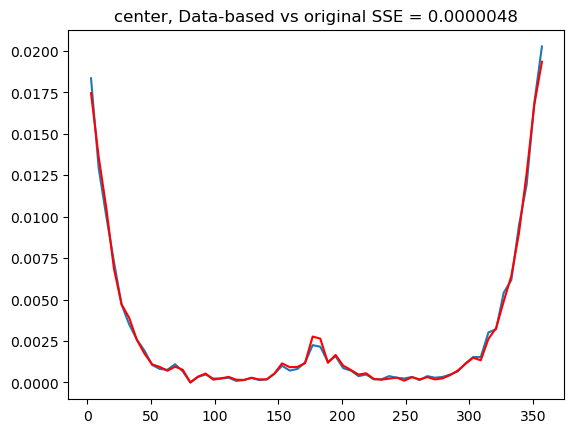

In [51]:

x = orig_dang['corner'][0]
for a in list(orig_dang.keys()):
    p = orig_dang[a][1]
    q = realm_dang[a][1]
    k_p = 1 / ((x[1] - x[0]) * sum(p))
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    p = p * k_p
    q = q * k_q
    sse = np.sum((p - q)**2)
    p[p==0] = 0.0000001
    q[q==0] = 0.0000001
    print('sse',sse)
    print(a+', Data-based vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
    plt.figure()
    plt.title(a+', Data-based vs original SSE = %1.7f' % sse)
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    plt.show()
    

### london

0.09129144086743045
corner, London vs original KL(P||Q) = 1.7249045


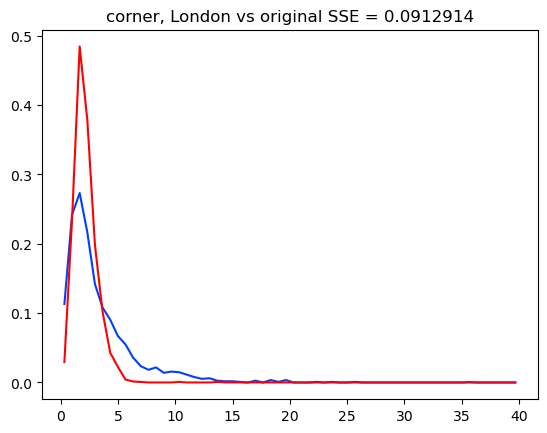

0.17916602203354323
wall, London vs original KL(P||Q) = 3.2464856


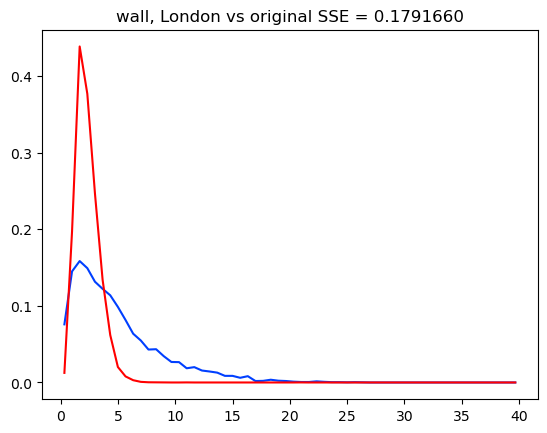

0.19693532756583904
center, London vs original KL(P||Q) = 3.4632387


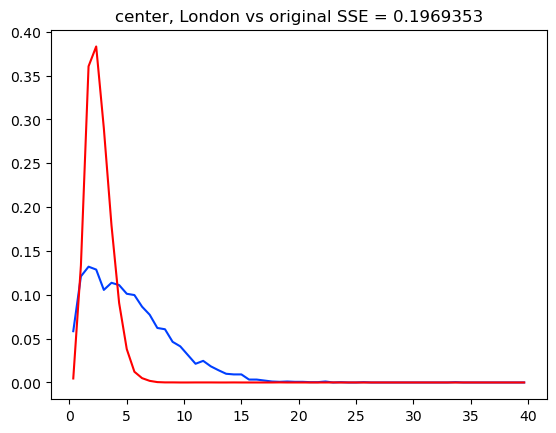

In [31]:
x = orig_stepl['corner'][0]
for a in list(orig_stepl.keys()):
    p = orig_stepl[a][1]
    q = lond_stepl[a][1][0]
    k_p = 1 / ((x[1] - x[0]) * sum(p))
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    p = p * k_p
    q = q * k_q
    # print(sum(p) * (x[1] - x[0]))
    # print(sum(q) * (x[1] - x[0]))
    sse = np.sum((p - q)**2)
    p[p==0] = 0.0000001
    q[q==0] = 0.0000001
    print(sse) 
    print(a+', London vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
    plt.figure()
    plt.title(a+', London vs original SSE = %1.7f' % sse)
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    plt.show()
    

0.0008139061638267515
corner, London vs original KL(P||Q) = 0.1438801


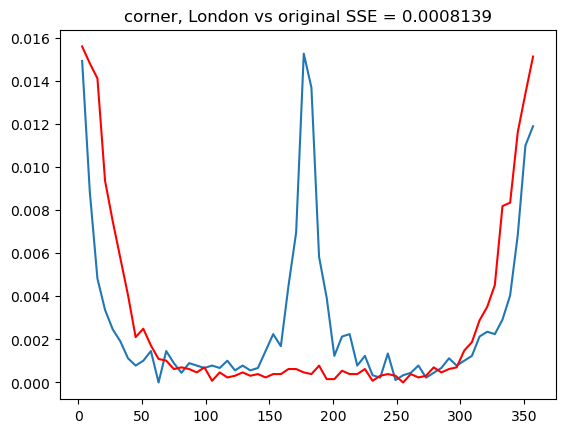

0.0003602743270837804
wall, London vs original KL(P||Q) = 0.1732669


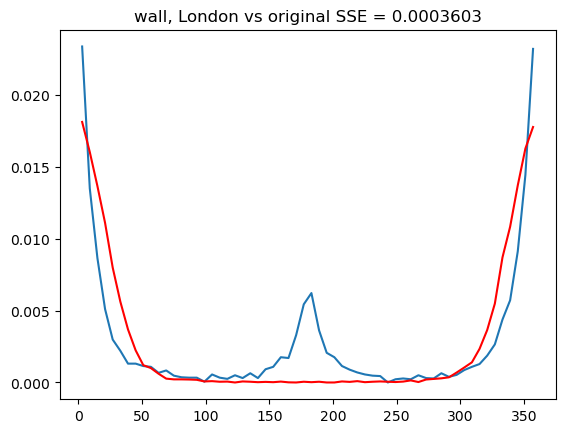

0.0001299507162485304
center, London vs original KL(P||Q) = 0.0872305


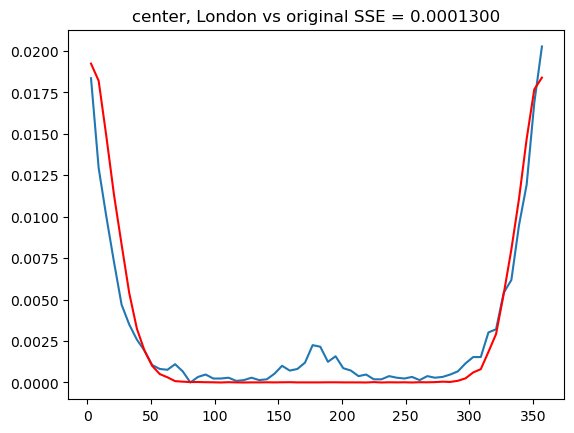

In [53]:
lond_dang
x = orig_dang['corner'][0]
for a in list(orig_dang.keys()):
    p = orig_dang[a][1]
    q = lond_dang[a][1][0]
    k_p = 1 / ((x[1] - x[0]) * sum(p))
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    p = p * k_p
    q = q * k_q
    sse = np.sum((p - q)**2)
    p[p==0] = 0.0000001
    q[q==0] = 0.0000001
    print(sse)
    print(a+', London vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
    plt.figure()
    plt.title(a+', London vs original SSE = %1.7f' % sse)
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    plt.show()
    

### rw

0.7242770834832317
corner, RW vs original KL(P||Q) = 19.0570739


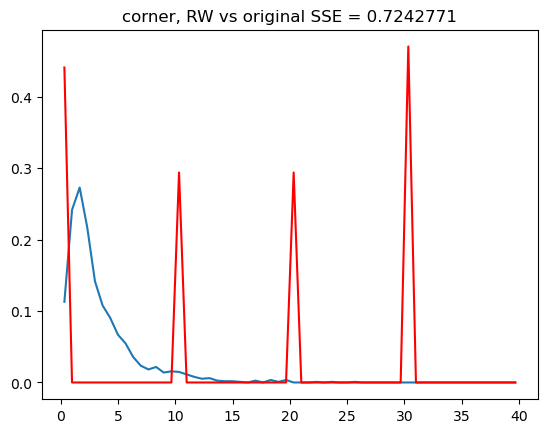

0.635639856576282
wall, RW vs original KL(P||Q) = 18.8356304


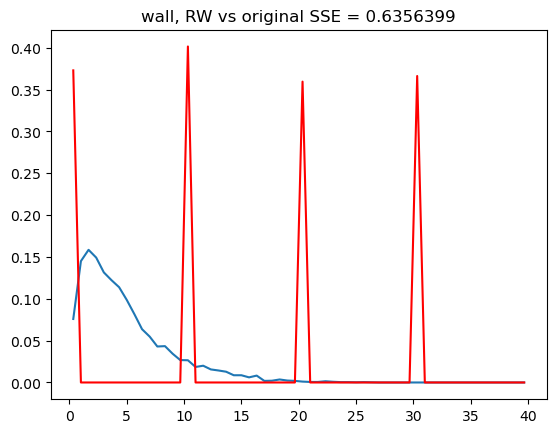

0.6303511917196948
center, RW vs original KL(P||Q) = 18.9853115


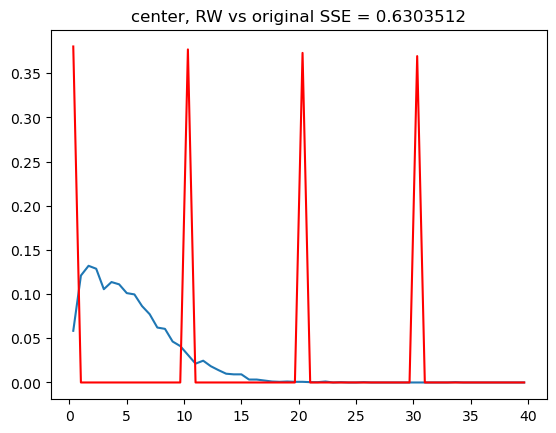

In [54]:
x = orig_stepl['corner'][0]
for a in list(orig_stepl.keys()):
    p = orig_stepl[a][1]
    q = rand_stepl[a][1]
    k_p = 1 / ((x[1] - x[0]) * sum(p))
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    p = p * k_p
    q = q * k_q
    # print(sum(p) * (x[1] - x[0]))
    # print(sum(q) * (x[1] - x[0]))
    sse = np.sum((p - q)**2)
    print(sse) 
    p[p==0] = 0.0000001
    q[q==0] = 0.0000001
    print(a+', RW vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
    plt.figure()
    plt.title(a+', RW vs original SSE = %1.7f' % sse)
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    plt.show()
    

0.011434651186184199
corner, RW vs original KL(P||Q) = 1.4860815


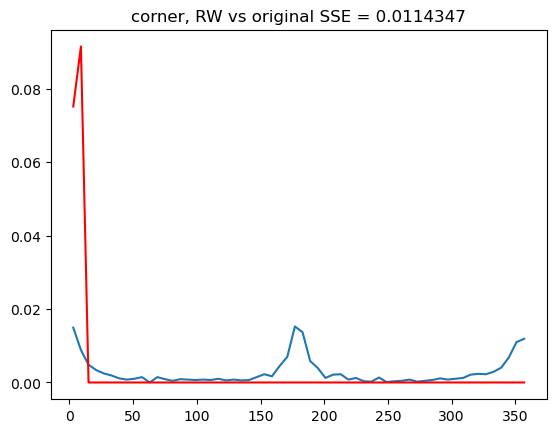

0.009585175859249676
wall, RW vs original KL(P||Q) = 1.2860825


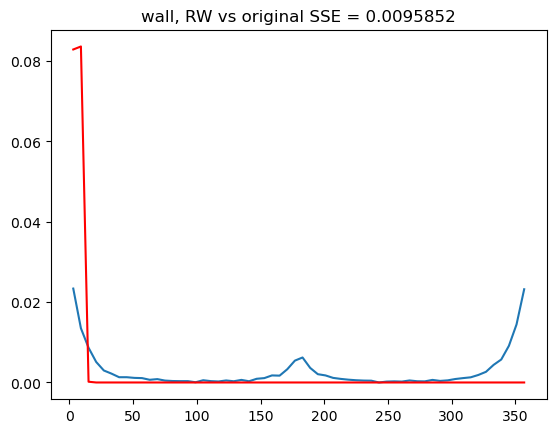

0.010407819507025896
center, RW vs original KL(P||Q) = 1.3526197


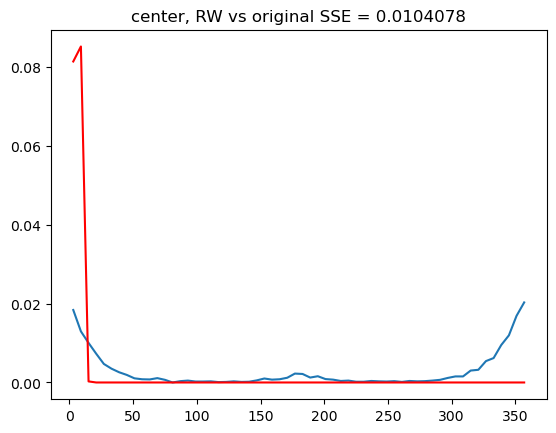

In [55]:
x = orig_dang['corner'][0]
for a in list(orig_dang.keys()):
    p = orig_dang[a][1]
    q = rand_dang[a][1]
    k_p = 1 / ((x[1] - x[0]) * sum(p))
    k_q = 1 / ((x[1] - x[0]) * sum(q))
    p = p * k_p
    q = q * k_q
    sse = np.sum((p - q)**2)
    print(sse)
    p[p==0] = 0.0000001
    q[q==0] = 0.0000001
    print(a+', RW vs original KL(P||Q) = %1.7f' % kl_divergence(p, q))
    plt.figure()
    plt.title(a+', RW vs original SSE = %1.7f' % sse)
    plt.plot(x, p)
    plt.plot(x, q, c='red')
    plt.show()